<a href="https://colab.research.google.com/github/jcmachicao/pucp_energy_efficiency_AI/blob/main/02_NeuralNetworks/hvac_data_01_prediction_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Replace with the actual URL of your CSV file
url = 'https://github.com/jcmachicao/pucp_energy_efficiency_AI/raw/refs/heads/main/00_data/HVAC_dataset.xlsx'
data = pd.read_excel(url)
data.head(2)

,Date,on_off,damper,active_energy,co2_1,amb_humid_1,active_power,pot_gen,high_pressure_1,high_pressure_2,low_pressure_1,low_pressure_2,high_pressure_3,low_pressure_3,outside_temp,outlet_temp,inlet_temp,summer_setpoint_temp,winter_setpoint_temp,amb_temp_2
0,2022-01-06 00:00:00,0.0,0.0,363150.69,975.0,35.0,0.36,4.0,15.09,15.0,15.27,15.1,15.2,15.2,23.4,24.2,22.8,22.5,18.0,23.4
1,2022-01-06 00:05:00,0.0,0.0,NaN,977.0,35.0,0.36,NaN,15.03,14.9,15.21,15.0,15.2,15.1,23.3,24.2,22.7,22.5,18.0,23.3


In [ ]:
data.fillna(method="bfill", inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  25632 non-null  object 
 1   on_off                25632 non-null  float64
 2   damper                25632 non-null  float64
 3   active_energy         25630 non-null  float64
 4   co2_1                 25632 non-null  float64
 5   amb_humid_1           25632 non-null  float64
 6   active_power          25632 non-null  float64
 7   pot_gen               25630 non-null  float64
 8   high_pressure_1       25632 non-null  float64
 9   high_pressure_2       25632 non-null  float64
 10  low_pressure_1        25632 non-null  float64
 11  low_pressure_2        25632 non-null  float64
 12  high_pressure_3       25632 non-null  float64
 13  low_pressure_3        25632 non-null  float64
 14  outside_temp          25632 non-null  float64
 15  outlet_temp        

<ipython-input-3-58fa1ef74984>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="bfill", inplace=True)


In [ ]:
data.Date.isna().sum()

0

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', infer_datetime_format=True)
data.set_index('Date', inplace=True)

<ipython-input-5-cf9c410c4bfa>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce', infer_datetime_format=True)


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
df.index = data.index

In [ ]:
df.index.day.unique()

Index([6, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       7, 30, 8],
      dtype='int32', name='Date')

In [ ]:
df.columns

Index(['on_off', 'damper', 'active_energy', 'co2_1', 'amb_humid_1',
       'active_power', 'pot_gen', 'high_pressure_1', 'high_pressure_2',
       'low_pressure_1', 'low_pressure_2', 'high_pressure_3', 'low_pressure_3',
       'outside_temp', 'outlet_temp', 'inlet_temp', 'summer_setpoint_temp',
       'winter_setpoint_temp', 'amb_temp_2'],
      dtype='object')

In [ ]:
output_variable_dt = 'on_off'

(1068, 19)


<ipython-input-12-fbad7e6c5763>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(filtered_date_df[(df.on_off == 0)], x="Date", y="inlet_temp", label="inlet=0")
<ipython-input-12-fbad7e6c5763>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(filtered_date_df[(df.on_off == 1)], x="Date", y="inlet_temp", label="inlet=1")


Text(0.5, 1.0, 'Temperature Measurement at 8/20')

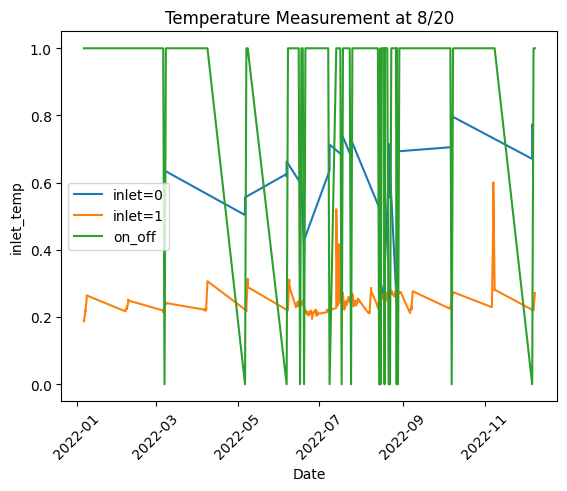

In [ ]:
day = 20
month = 8
year = 2022
hour = 12
filtered_date_df = df[(df.index.hour == hour) & (df.index.hour == hour)]
print(filtered_date_df.shape)

sns.lineplot(filtered_date_df[(df.on_off == 0)], x="Date", y="inlet_temp", label="inlet=0")
sns.lineplot(filtered_date_df[(df.on_off == 1)], x="Date", y="inlet_temp", label="inlet=1")
sns.lineplot(filtered_date_df, x="Date", y=output_variable_dt, label=output_variable_dt)
# sns.lineplot(df[(df.Date.dt.day == 7) & (df.Date.dt.month == 1)], x="Date", y="outlet_temp", label="outlet")

plt.xticks(rotation=45)
plt.title(f"Temperature Measurement at {month}/{day}")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
features_dt = ["inlet_temp","outside_temp", "amb_humid_1"]

In [ ]:
target = output_variable_dt

In [ ]:
X = df[features_dt]
y = df[target]

In [ ]:
X.isna().sum()

,0
inlet_temp,0
outside_temp,0
amb_humid_1,0


In [ ]:
y.isna().sum()

0

In [ ]:
y.unique()

array([0., 1.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19224, 3), (6408, 3), (19224,), (6408,))

In [ ]:
model = DecisionTreeClassifier(max_depth=3)

dev_score = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Model CV Accuracy :{dev_score.mean()}")
print(f"Model Test Accuracy :{test_score}")

Model CV Accuracy :0.8801496057558161
Model Test Accuracy :0.8798377028714107


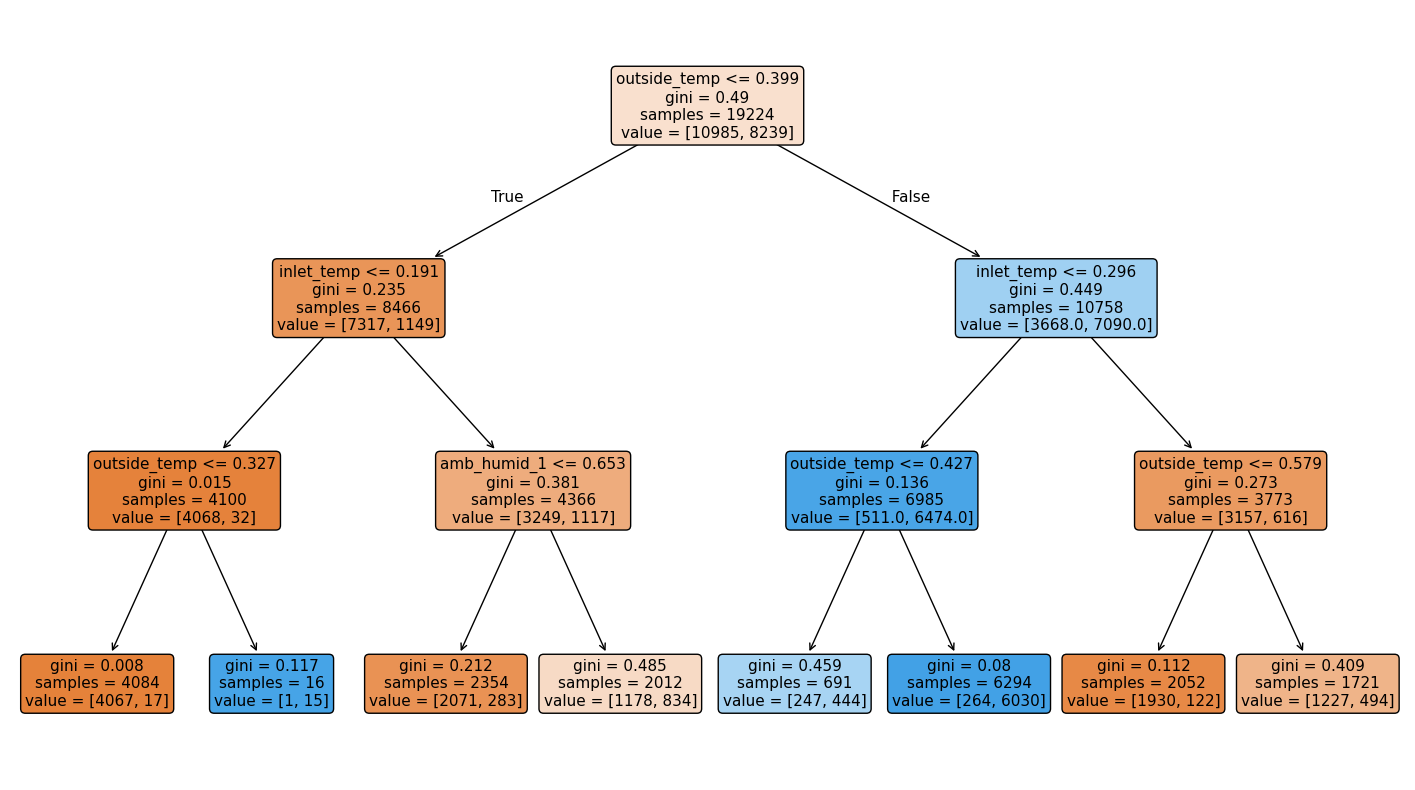

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18,10))
plot_tree(model, rounded=True, fontsize=11, label='all', filled=True, feature_names=X.columns)
plt.show()

### References

https://www.kaggle.com/code/kiritowu/aircon-classification-w-temperature-humidity/notebook